In [1]:
from keras.utils import Sequence
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
file = open('./datasets/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split('\n')[0]
        last = last.strip()
        
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [4]:
len(processedList)

343416

In [33]:
columns = ['user_id', 'activity', 'time', 'x', 'y', 'z']

In [34]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user_id,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164;


In [35]:
data.shape

(343416, 6)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [37]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

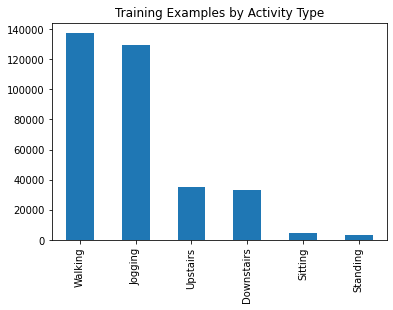

In [38]:
data['activity'].value_counts().plot(kind='bar',title='Training Examples by Activity Type')
plt.show()

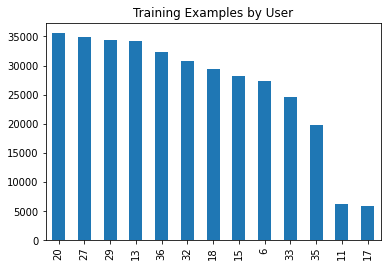

In [40]:
data['user_id'].value_counts().plot(kind='bar', title='Training Examples by User')
plt.show()

In [41]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

ValueError: could not convert string to float: '0.50395286;'

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  object 
dtypes: float64(2), object(4)
memory usage: 15.7+ MB


In [15]:
Fs = 100

In [16]:
labels = data['label'].value_counts().index

In [17]:
labels

Index(['label2', 'label3', 'label1'], dtype='object')

       label           time        x        y        z
1000  label2  1604993313075 -9.68897 -0.07845  0.62763
1001  label2  1604993313176 -8.27681  0.62763  0.58840
1002  label2  1604993313277 -8.62985  0.86299  0.82376
1003  label2  1604993313378 -9.88510 -0.11768  0.47072
1004  label2  1604993313480 -9.21825  0.19613  0.58840
...      ...            ...      ...      ...      ...
1995  label2  1604993415198 -7.72764 -0.31381  0.27459
1996  label2  1604993415301 -9.68897  1.37293  0.11768
1997  label2  1604993415403 -9.80665 -1.33370  0.94144
1998  label2  1604993415506 -7.49228 -0.43149  0.15691
1999  label2  1604993415609 -5.96244  0.58840 -0.15691

[1000 rows x 5 columns]


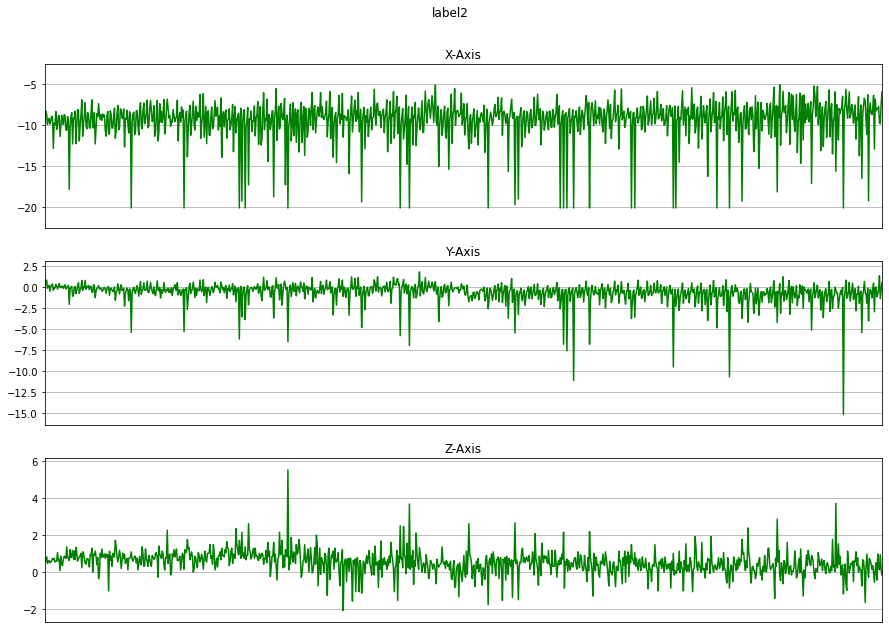

       label           time        x        y        z
2000  label3  1604993437285 -9.21825 -1.72597 -0.07845
2001  label3  1604993437386 -9.21825 -1.80442 -0.07845
2002  label3  1604993437487 -9.21825 -1.80442 -0.07845
2003  label3  1604993437589 -9.21825 -1.80442 -0.03923
2004  label3  1604993437690 -9.21825 -1.80442 -0.07845
...      ...            ...      ...      ...      ...
2995  label3  1604993539433 -8.94366 -2.27514  0.90221
2996  label3  1604993539535 -8.98289 -2.27514  0.62763
2997  label3  1604993539638 -8.98289 -2.43205  0.50995
2998  label3  1604993539741 -8.94366 -2.31437  0.74531
2999  label3  1604993539844 -8.86521 -2.27514  0.66685

[1000 rows x 5 columns]


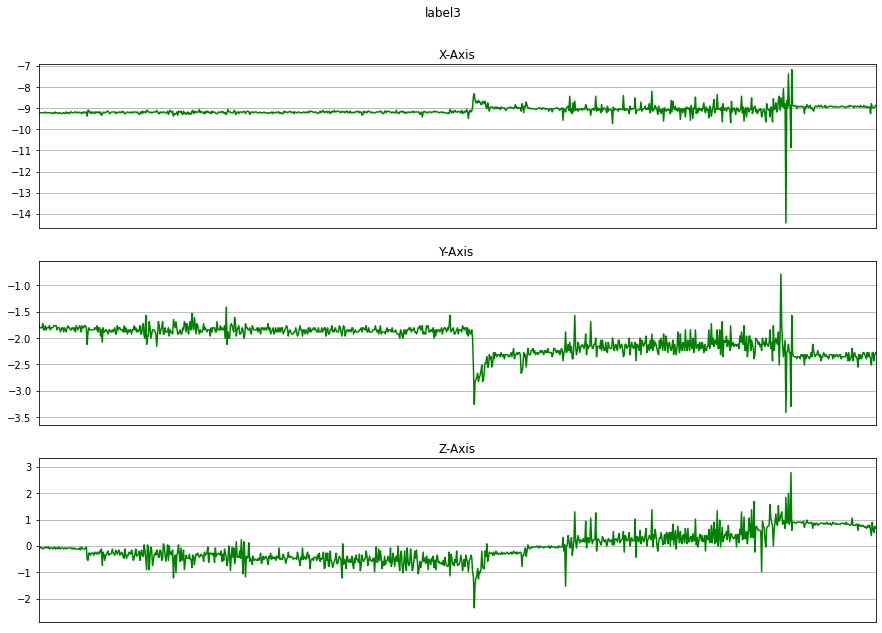

      label           time         x         y         z
0    label1  1604993181679   2.62818  -2.43205   8.15913
1    label1  1604993181780 -20.08402  20.04479 -20.08402
2    label1  1604993181881   5.76631  -8.55140  19.14258
3    label1  1604993181983  -6.15858  15.96523 -20.08402
4    label1  1604993182084   1.52984  -1.37293   4.51106
..      ...            ...       ...       ...       ...
995  label1  1604993283864   1.37293  12.59174  -2.54973
996  label1  1604993283967   0.70608  12.43483  -2.11824
997  label1  1604993284070   1.56906  11.96411  -1.88288
998  label1  1604993284172   0.98067  11.65030   0.19613
999  label1  1604993284275   1.05912  11.68953   0.15691

[1000 rows x 5 columns]


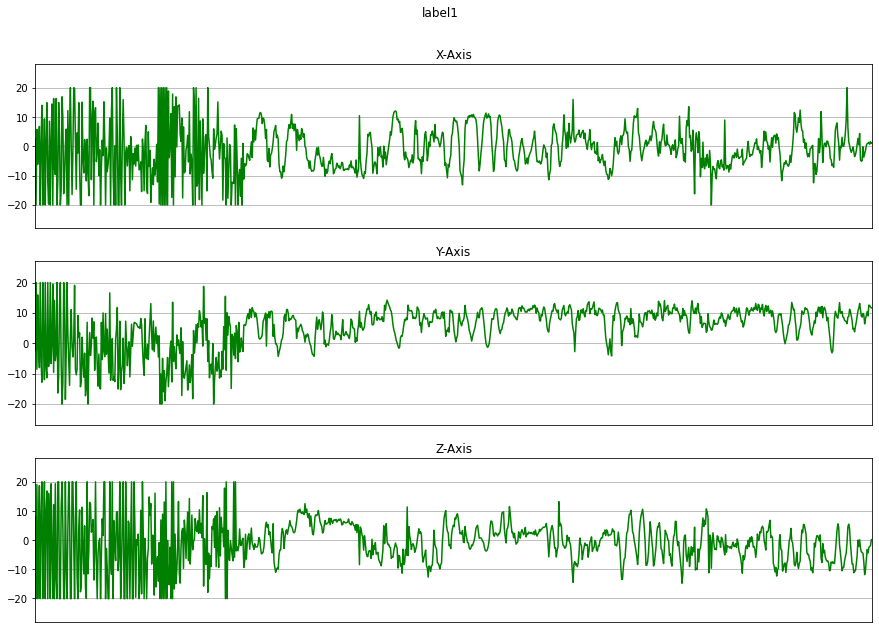

In [18]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for label in labels:
    data_for_plot = data[(data['label'] == label)][:Fs*10]
    print(data_for_plot)
    plot_activity(label, data_for_plot)

In [ ]:
df['activity']

In [19]:
df = data.drop(['time'], axis = 1).copy()
df.head()

,label,x,y,z
0,label1,2.62818,-2.43205,8.15913
1,label1,-20.08402,20.04479,-20.08402
2,label1,5.76631,-8.55140,19.14258
3,label1,-6.15858,15.96523,-20.08402
4,label1,1.52984,-1.37293,4.51106


In [20]:
df['label'].value_counts()

label2    1000
label3    1000
label1    1000
Name: label, dtype: int64

In [21]:
label1 = df[df['label']=='label1'].head(1000).copy()
label2 = df[df['label']=='label2'].head(1000).copy()
label3 = df[df['label']=='label3'].head(1000).copy()

In [22]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([label1, label2, label3])
balanced_data.shape

(3000, 4)

In [23]:
balanced_data['label'].value_counts()

label2    1000
label3    1000
label1    1000
Name: label, dtype: int64

In [24]:
balanced_data.head()

,label,x,y,z
0,label1,2.62818,-2.43205,8.15913
1,label1,-20.08402,20.04479,-20.08402
2,label1,5.76631,-8.55140,19.14258
3,label1,-6.15858,15.96523,-20.08402
4,label1,1.52984,-1.37293,4.51106


In [25]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label = LabelEncoder()
balanced_data['label_num'] = label.fit_transform(balanced_data['label'])
balanced_data.head()

,label,x,y,z,label_num
0,label1,2.62818,-2.43205,8.15913,0
1,label1,-20.08402,20.04479,-20.08402,0
2,label1,5.76631,-8.55140,19.14258,0
3,label1,-6.15858,15.96523,-20.08402,0
4,label1,1.52984,-1.37293,4.51106,0


In [24]:
label.classes_

array(['label1', 'label2', 'label3'], dtype=object)

In [25]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label_num']

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label_num'] = y.values

scaled_X

,x,y,z,label_num
0,1.464493,-0.638272,1.741056,0
1,-2.185377,3.674259,-4.216413,0
2,1.968793,-1.812365,4.057850,0
3,0.052453,2.891532,-4.216413,0
4,1.287988,-0.435064,0.971550,0
...,...,...,...,...
2995,-0.395112,-0.608167,0.210318,2
2996,-0.401416,-0.608167,0.152399,2
2997,-0.401416,-0.638272,0.127576,2
2998,-0.395112,-0.615694,0.177222,2


# Frame preparation

In [27]:
import scipy.stats as stats

In [28]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [29]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label_num'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [30]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [31]:
X.shape, y.shape

((73, 80, 3), (73,))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [33]:
X_train.shape, X_test.shape

((58, 80, 3), (15, 80, 3))

In [34]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [35]:
X_train = X_train.reshape(58, 80, 3, 1) # X_train.shape ((58,80,3)) -> ((58,80,3,1))로 변환해준다
X_test = X_test.reshape(15, 80, 3, 1)

In [36]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

# 2D CNN Model

In [37]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [38]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [39]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
2/2 [==============================] - 0s 117ms/step - loss: 1.0045 - accuracy: 0.5000 - val_loss: 0.7366 - val_accuracy: 0.8000
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 0.7442 - accuracy: 0.7069 - val_loss: 0.5975 - val_accuracy: 0.8000
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 0.5929 - accuracy: 0.8621 - val_loss: 0.4925 - val_accuracy: 0.8000
Epoch 4/10
2/2 [==============================] - 0s 11ms/step - loss: 0.4894 - accuracy: 0.8966 - val_loss: 0.4043 - val_accuracy: 0.9333
Epoch 5/10
2/2 [==============================] - 0s 10ms/step - loss: 0.3842 - accuracy: 0.9483 - val_loss: 0.3280 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 10ms/step - loss: 0.3378 - accuracy: 0.9310 - val_loss: 0.2663 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 11ms/step - loss: 0.2661 - accuracy: 0.9655 - val_loss: 0.2138 - val_accuracy: 1.0000
Epoch 8/10
2/2 [==========

In [40]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

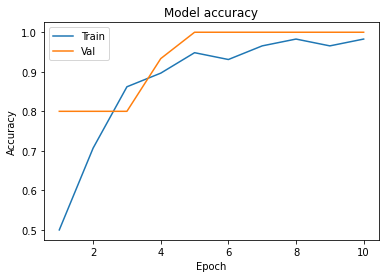

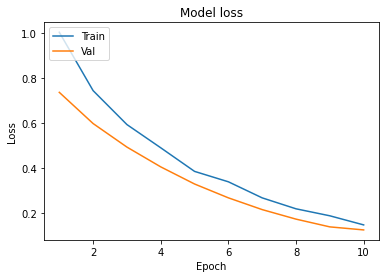

In [41]:
plot_learningCurve(history, 10)

# Confusion Matrix

In [42]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [48]:
X_test

array([[[[-1.87089494e-01],
         [ 1.09186617e-01],
         [-5.52706412e-01]],

        [[-3.88809228e-01],
         [-2.06000769e-01],
         [-7.73337421e-01]],

        [[-2.56430301e-01],
         [-3.50986677e-01],
         [-2.12303456e-01]],

        ...,

        [[ 1.44124050e-01],
         [ 3.92352345e-01],
         [ 2.26867518e-01]],

        [[ 2.43415368e-01],
         [ 1.11026241e-01],
         [ 3.65577519e-02]],

        [[ 1.52399029e-01],
         [ 6.96555611e-02],
         [ 5.24739363e-01]]],


       [[[-4.26631778e-01],
         [-4.64454329e-01],
         [-4.45543054e-01]],

        [[-4.51845741e-01],
         [-4.45543054e-01],
         [-4.32934466e-01]],

        [[-4.58150035e-01],
         [-4.26631778e-01],
         [-4.32934466e-01]],

        ...,

        [[ 1.17349224e-02],
         [-7.10064366e-02],
         [ 3.46205207e-03]],

        [[-1.20652096e-01],
         [-6.27335663e-02],
         [ 5.31077112e-02]],

        [[-7.10064366e-0

In [3]:
y_test

NameError: name 'y_test' is not defined

In [49]:
X_test.shape

(15, 80, 3, 1)

In [2]:
y_pred = model.predict_classes(X_test)

NameError: name 'model' is not defined

In [1]:
y_pred

NameError: name 'y_pred' is not defined

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

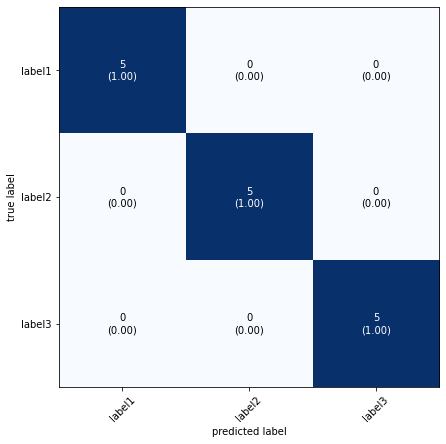

In [44]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

In [45]:
model.save('bark_model.h5')

In [46]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [47]:
import keras
print(keras.__version__)

2.4.3
